Version of numpy: 1.26.3
Version of matplotlib: 3.8.2

 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 Shape of Input: (3, 4)

 Input in matrix form:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 Shape of Input Matrix: (4, 3)

 Actual Output:
[[1]
 [1]
 [0]]

 Output in matrix form:
[[1 1 0]]

 Shape of Output: (1, 3)
(4, 3) (3, 1)
[[0.71470053 0.73526804 0.70948954]]
(3, 1)
(4, 3)
(4, 3)
[[0.75274979 0.67420672 0.62561196]
 [0.16157876 0.91600636 0.04655445]
 [0.52611744 0.62327509 0.39144782]
 [0.44081275 0.32395295 0.74924072]]
[[0.30975321]
 [0.13231874]
 [0.6475271 ]]
[[ 1.30959749 -0.05314739  1.45987661]
 [-1.21752179  1.65266662 -1.77891495]
 [ 1.08296515 -0.10407902  1.22571247]
 [-0.6156054   0.64270378 -0.61504492]]


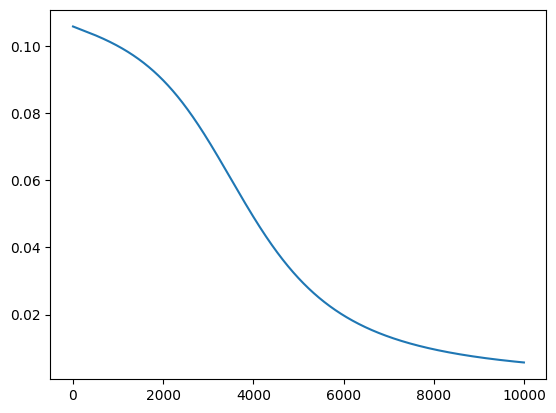

[[0.94798049 0.90856637 0.15342622]]
[[0.00135301 0.00418005 0.0117698 ]]


In [1]:
# Steps to build a Neural Network in NumPy
'''
<ol>1. Loading the dataset (Input and Output)</ol>
<ol>2. Architecture of the model (# input, hidden and output neurons)</ol>
<ol>3. Initializing the weights for all the layers</ol>
<ol>4. Implementing forward propagation</ol>
<ol>5. Implementing backward propagation</ol>
<ol>6. Train the model for n epochs </ol>
'''

#1 Loading the dataset (Input and Output)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# version of numpy library
print('Version of numpy:',np.__version__)

# version of matplotlib library
print('Version of matplotlib:',matplotlib.__version__)

# creating the input array
X=np.array([[1,0,1,0], [1,0,1,1], [0,1,0,1]])
print ('\n Input:')
print(X)
# shape of input array
print('\n Shape of Input:', X.shape)

# converting the input in matrix form
X = X.T
print('\n Input in matrix form:')
print(X)
# shape of input matrix
print('\n Shape of Input Matrix:', X.shape)

# creating the output array
y=np.array([[1],[1],[0]])
print ('\n Actual Output:')
print(y)

# output in matrix form
y = y.T

print ('\n Output in matrix form:')
print(y)

# shape of input array
print('\n Shape of Output:', y.shape)

## 2. Architecture of the model (# input, hidden and output neurons)
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

## 3. Initializing the weights for all the layers

#NOTE: #For simplicity, we are assuming that the bias for all the layers is 0

# initializing weight
# Shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))

# Shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

# shape of weight matrix
print(w_ih.shape, w_ho.shape)

## 4. Implementing forward propagation

# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# hidden layer activations

hidden_layer_input=np.dot(w_ih.T,X)
hiddenlayer_activations = sigmoid(hidden_layer_input)

# calculating the output
output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
output = sigmoid(output_layer_input)

#output
print(output)

## 5. Implementing backward propagation
# calculating error
error = np.square(y-output)/2

### Rate of change of error w.r.t weight between hidden and output layer
'''
**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t weights between hidden and output layer**
'''
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)
# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output,(1-output))
# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hiddenlayer_activations

# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_who.shape

# shape of weights of output layer
w_ho.shape

# rate of change of error w.r.t weight between hidden and output layer
error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)

print(error_wrt_who.shape)

### Rate of change of error w.r.t weight between input and hidden layer
#**a. Rate of change of error w.r.t output**

#**b. Rate of change of output w.r.t Z2**

#**c. Rate of change of Z2 w.r.t hidden layer activations**

#**d. Rate of change of hidden layer activations w.r.t Z1**

#**e. Rate of change of Z1 w.r.t weights between input and hidden layer**

# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output,(1-output))

# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_ho


# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape, Z1_wrt_wih.shape

# shape of weights of hidden layer
print(w_ih.shape)

# rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(output_wrt_Z2*error_wrt_output))).T)

print(error_wrt_wih.shape)

### Update the parameters
# defining the learning rate
lr = 0.01

# initial w_ho and w_ih
w_ho

w_ih

# updating the weights of output layer
w_ho = w_ho - lr * error_wrt_who

# updating the weights of hidden layer
w_ih = w_ih - lr * error_wrt_wih

# updated w_ho and w_ih
w_ho
w_ih

## 6. Training the model for n epochs
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

# defining the parameters
lr = 0.01
epochs = 10000

# initial w_ih and w_ho
print(w_ih)

print(w_ho)

error_epoch = []
for i in range(epochs):
    # Forward Propogation
    
    # hidden layer activations
    hidden_layer_input=np.dot(w_ih.T,X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)    
    # calculating the output
    output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
    output = sigmoid(output_layer_input)
    
    
    # Backward Propagation
    
    # calculating error
    error = np.square(y-output)/2
    error_wrt_output = -(y-output)
    output_wrt_Z2 = np.multiply(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    # rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).T)

    # updating the weights between hidden and output layer
    w_ho = w_ho - lr * error_wrt_who
    # updating the weights between input and hidden layer
    w_ih = w_ih - lr * error_wrt_wih
    
    # appending the error of each epoch
    error_epoch.append(np.average(error))


# updated w_ih and w_ho
print(w_ih)
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_epoch))

plt.show()
print(output)

# error at last epoch
print(error)





